# Data visualization project for landscaping company.



sub-goals：
1. Which type of job should we focus on?
2. Research difference between residential and commercial customer type, whether we need make some adjustments in job service based on the different customer type?

## Load library

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

## Load data

In [13]:
df = pd.read_csv('landscaping.csv') 

## Visualization 1
### Bar plot(explanatory visualization that contains derived data types)
This Bar plot shows the total profit of the top 5 most profitable job type. (profit =invoice_amount -material_costs).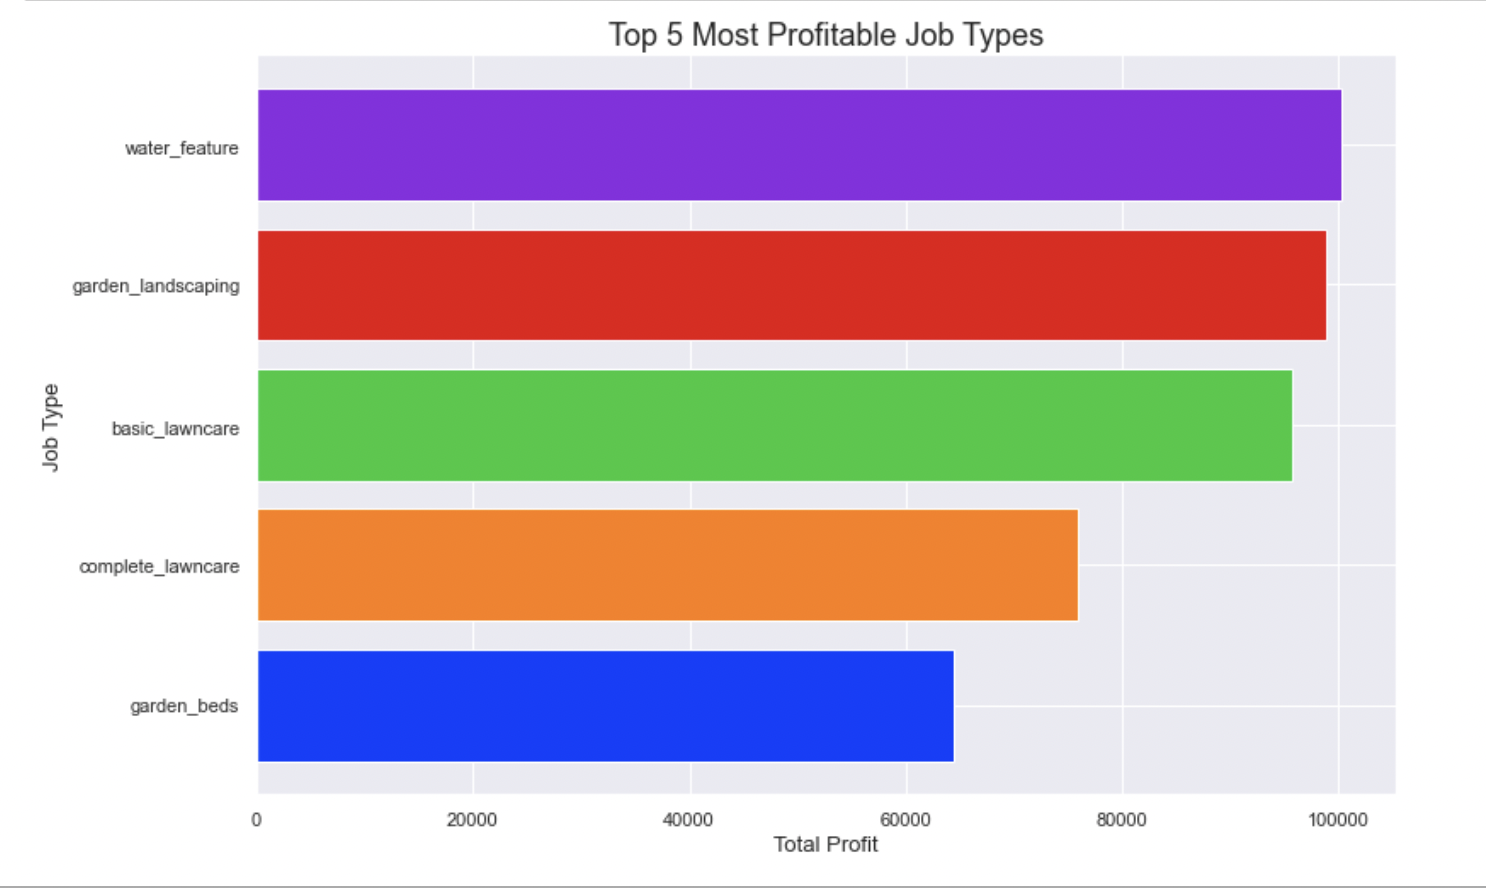

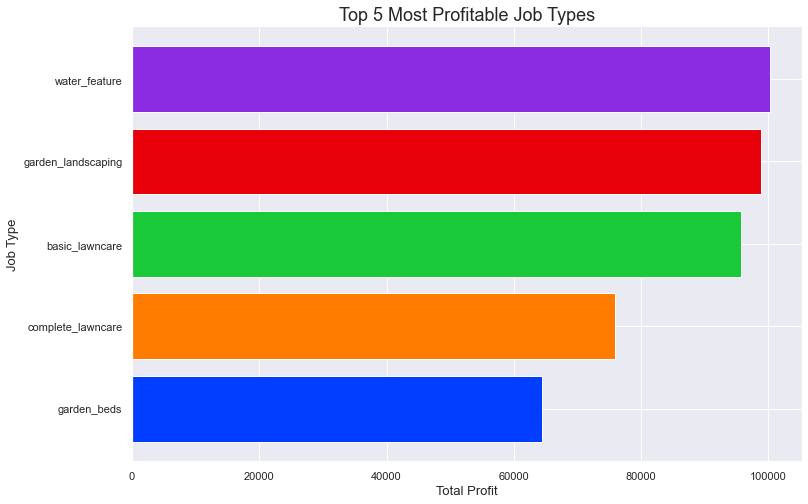

In [19]:
# Caculate profit of job_type
df['profit'] = df['invoice_amount'] - df['material_costs']

# Group the data by job type and compute the total profit for each job type
profit_by_job_type = df.groupby('job_type')['profit'].sum()

# Sort the resulting by profit in descending order and select the top 5 rows
top_5_profitable_jobs = profit_by_job_type.sort_values(ascending=False).head(5)

top_5_profitable_jobs = top_5_profitable_jobs.iloc[::-1]

# Create a color palette for the job types
colors = sns.color_palette('bright', n_colors=len(top_5_profitable_jobs))

# Create a horizontal bar plot of the top 5 most profitable job types with different colors
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(top_5_profitable_jobs.index, top_5_profitable_jobs.values, color=colors)
ax.set_xlabel('Total Profit', fontsize=13)
ax.set_ylabel('Job Type', fontsize=13)
ax.set_title('Top 5 Most Profitable Job Types', fontsize=18)
plt.show()

## Visualization 2
### Box plot(exploratory visualization with interactive elements)
This box plot shows customer satisfaction distribution for the top 5 most profitable job type in this company. This is interactive visualization. An interactive dropdown menu allows for the data to be filtered around the customer type. The “Residential” option filters to residential customer, “Commercial” filters to commercial customer, and “All’ applies no filtering.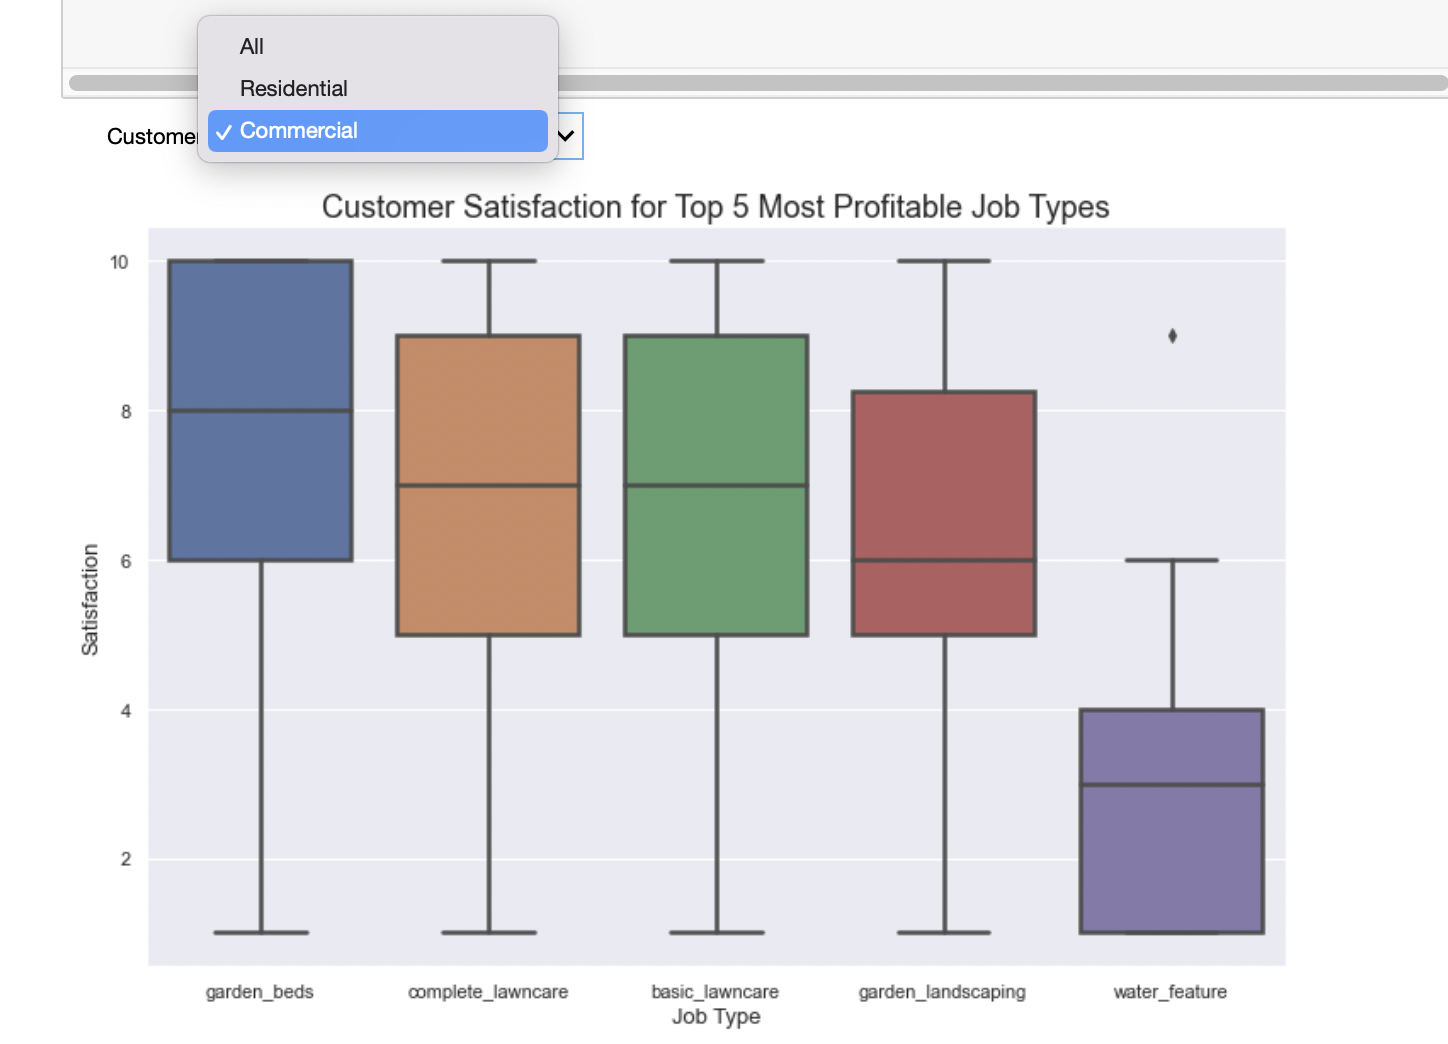

Dropdown(description='Customer:', options=('All', 'Residential', 'Commercial'), value='All')

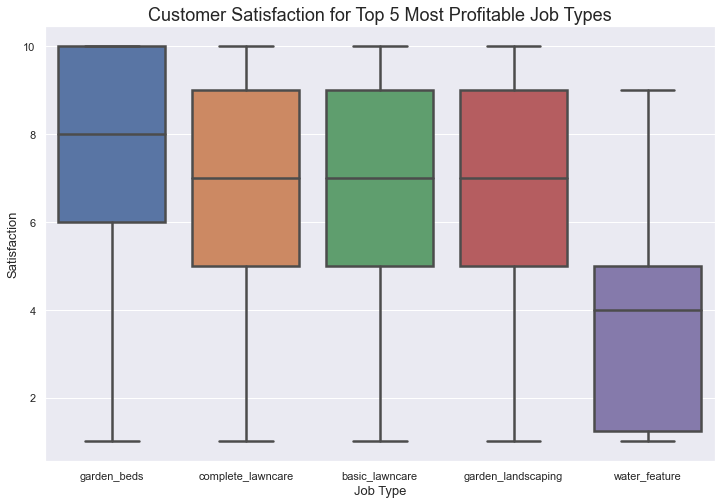

In [20]:
# Prepare data
residential_df = df[df['customer_type'] == 'residential']
commercial_df = df[df['customer_type'] == 'commercial']

# Define dropdown menu options
options = ['All', 'Residential', 'Commercial']

# Define dropdown menu widget
dropdown = widgets.Dropdown(options=options, value='All', description='Customer:')

# Define function to filter customer data based on dropdown selection
def filter_data(origin):
    if origin == 'All':
        return df
    elif origin == 'Residential':
        return residential_df
    else:
        return commercial_df

    
# Define function to update data based on dropdown selection
def update_data(change):
    # Clear the output
    clear_output(wait=True)
    # Display dropdown menu
    display(dropdown)
    origin = change.new
    filtered_data = filter_data(origin)
    #Create new plot
    sns.set(style='whitegrid')
    sns.set_palette('pastel')
    sns.set(rc={'figure.figsize': (12, 8)})
    sns.despine(left=True, bottom=True)
    sns.boxplot(data=filtered_data[filtered_data['job_type'].isin(top_5_profitable_jobs.index)], x='job_type', y='customer_satisfaction',
                order=top_5_profitable_jobs.index, linewidth=2.5)
    plt.xlabel('Job Type', fontsize=13)
    plt.ylabel('Satisfaction', fontsize=13)
    plt.title('Customer Satisfaction for Top 5 Most Profitable Job Types', fontsize=18)
    # Display plot
    plt.show()


# Call update_data function when dropdown value changes
sns.set(style='whitegrid')
sns.set_palette('pastel')
sns.set(rc={'figure.figsize': (12, 8)})
sns.despine(left=True, bottom=True)
sns.boxplot(data=df[df['job_type'].isin(top_5_profitable_jobs.index)], x='job_type', y='customer_satisfaction',
                order=top_5_profitable_jobs.index, linewidth=2.5)
dropdown.observe(update_data, names='value')
plt.xlabel('Job Type', fontsize=13)
plt.ylabel('Satisfaction', fontsize=13)
plt.title('Customer Satisfaction for Top 5 Most Profitable Job Types', fontsize=18)

# Display dropdown menu
display(dropdown)



## Visualization 3
### Heat map(exploratory visualization) 
This heatmap shows the average satisfaction of customer relative to their customer type and the top 5 most in-demand jobs.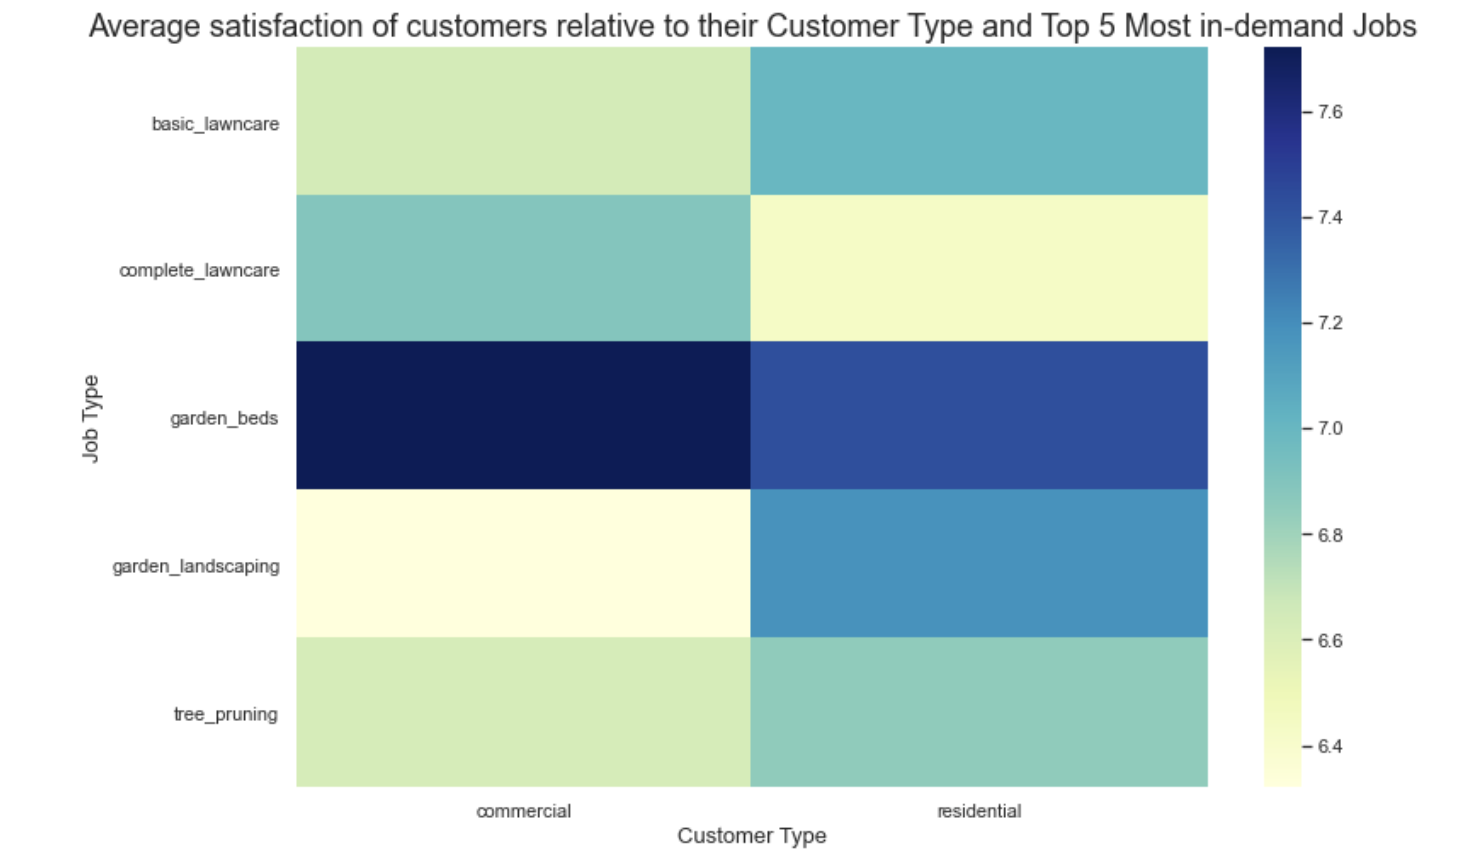

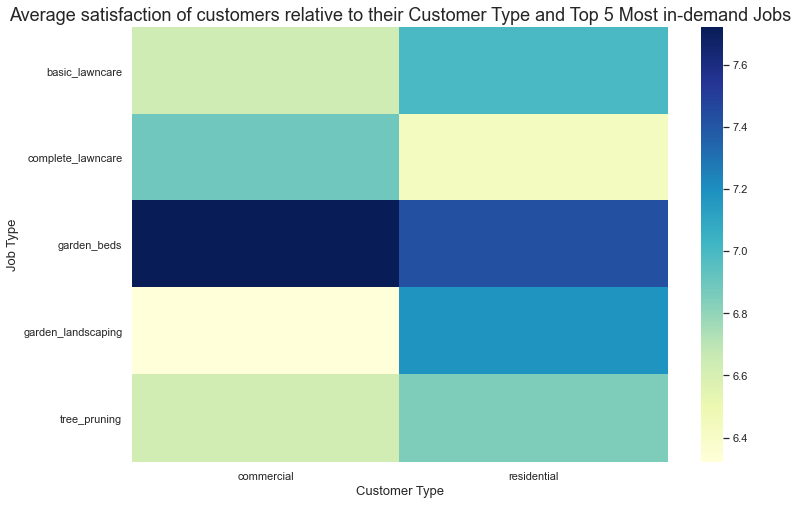

In [21]:
# Select the top 5 most frequently occurring job types
top5_jobs = df["job_type"].value_counts().head(5)


# Select the rows corresponding to the top 5 job types
top_jobs_df = df[df['job_type'].isin(top5_jobs.index)]

# Create a pivot table with customer type as columns, job types as rows, and the mean of the customer satisfaction column as values
pivot_df = top_jobs_df.pivot_table(values='customer_satisfaction', index='job_type', columns='customer_type', aggfunc='mean')

# Set up the figure with the desired size
fig, ax = plt.subplots(figsize=(12, 8))

# Create a heatmap with the pivot table
sns.heatmap(pivot_df, cmap='YlGnBu',)

# Add axis labels and a title
plt.xlabel('Customer Type',fontsize=13)
plt.ylabel('Job Type',fontsize=13)
plt.title('Average satisfaction of customers relative to their Customer Type and Top 5 Most in-demand Jobs',fontsize=18)

# Display the plot
plt.show()


## Visualization 4
### Line plot(explanatory visualization)
This plot shows the monthly job demand trend for each job type in 2022.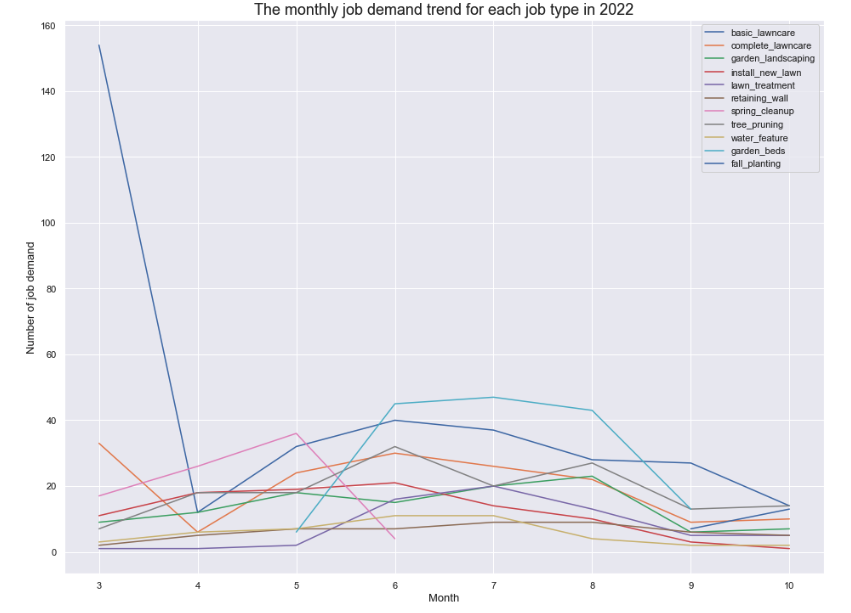

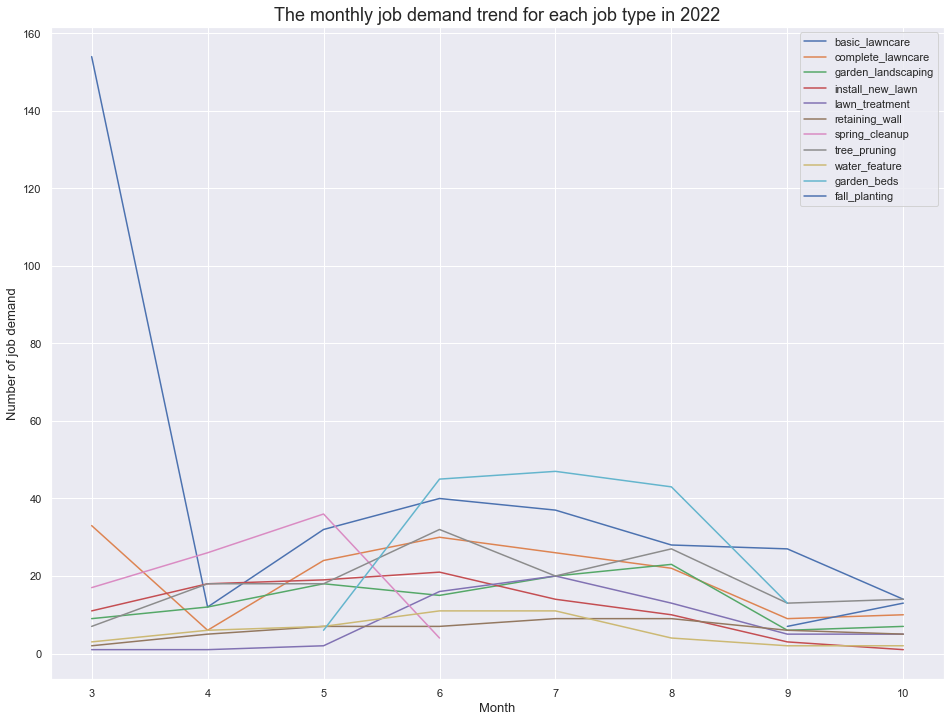

In [22]:
# Convert request_date to datetime format
df["request_date"] = pd.to_datetime(df["request_date"])

# Extract the month from the request_date column
df["month"] = df["request_date"].dt.month

# Count the number of requests per job type per month
counts = df.groupby(["month", "job_type"])["request_date"].count().reset_index()

# Create a line plot of the counts for each job type
fig, ax = plt.subplots(figsize=(16, 12))

for job_type in counts["job_type"].unique():
    x = counts[counts["job_type"] == job_type]["month"]
    y = counts[counts["job_type"] == job_type]["request_date"]
    ax.plot(x, y, label=job_type)

ax.legend()
ax.set_xlabel("Month", fontsize=13)
ax.set_ylabel("Number of job demand", fontsize=13)
ax.set_title("The monthly job demand trend for each job type in 2022", fontsize=18)
plt.show()
